# From Machine Learning with PyTorch and Scikit-Learn  

### Some artificial data

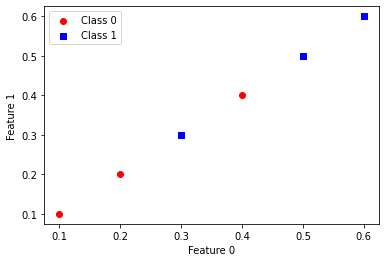

In [5]:
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

X = np.array([[0.1, 0.2, 0.4, 0.3, 0.5, 0.6],
              [0.1, 0.2, 0.4, 0.3, 0.5, 0.6]])
y = np.array([0, 0, 0, 1, 1, 1])

X = np.array([[0.1, 0.1],
              [0.2, 0.2],
              [0.4, 0.4],
              [0.3, 0.3],
              [0.5, 0.5],
              [0.6, 0.6]])
y = np.array([0, 0, 0, 1, 1, 1])

# plot data
plt.scatter(X[:3, 0], X[:3, 1],
            color='red', marker='o', label='Class 0')
plt.scatter(X[3:, 0], X[3:, 1],
            color='blue', marker='s', label='Class 1')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper left')

plt.show()

<br>
<br>

### A function for plotting decision regions

In [6]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

<br>
<br>

In [7]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

<br>
<br>

## Large scale machine learning and stochastic gradient descent

In [8]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

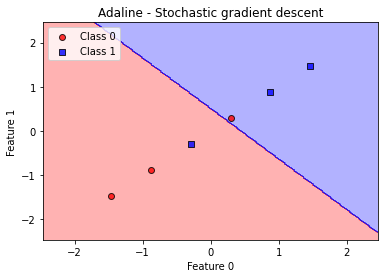

In [9]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper left')

Text(0, 0.5, 'Average loss')

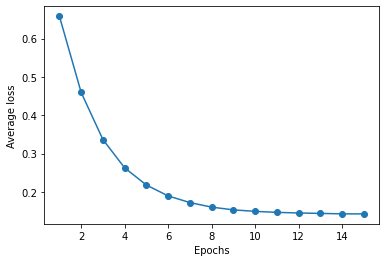

In [18]:
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

<br>
<br>

In [19]:
# Changes to books code below marked #LS

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        #self.b_ = 0. # same! #LS
        
        self.errors_ = []
        
        # calculate and print the number of initial errors #LS
        initial_errors = 0
        for xi, target in zip(X, y):
            if self.predict(xi) != target:
                initial_errors += 1
        print("initial errors: ", initial_errors)

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi)) #LS
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print("Errors: ", errors) #LS
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

initial errors:  3
Errors:  2
Errors:  3
Errors:  2
Errors:  5
Errors:  4
Errors:  5
Errors:  4
Errors:  4
Errors:  2
Errors:  2
Errors:  2
Errors:  2
Errors:  5
Errors:  4
Errors:  5


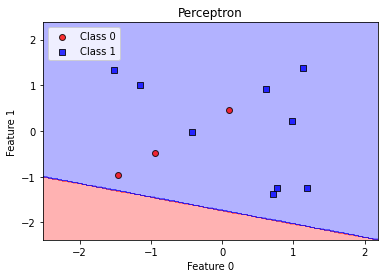

In [20]:
ppn = Perceptron(n_iter=15, eta=0.01, random_state=1)
ppn.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ppn)
plt.title('Perceptron')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper left')

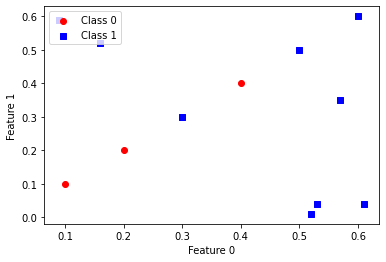

In [21]:
X = np.array([[0.1, 0.2, 0.4, 0.3, 0.5, 0.6],
              [0.1, 0.2, 0.4, 0.3, 0.5, 0.6]])
y = np.array([0, 0, 0, 1, 1, 1])

X = np.array([[0.1, 0.1],
              [0.2, 0.2],
              [0.4, 0.4],
              [0.3, 0.3],
              [0.5, 0.5],
              [0.6, 0.6],
              [0.52, 0.01],
              [0.57, 0.35],
              [0.53, 0.04],
              [0.16, 0.52],
              [0.61, 0.04],
              [0.09, 0.59]])
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# plot data
plt.scatter(X[:3, 0], X[:3, 1],
            color='red', marker='o', label='Class 0')
plt.scatter(X[3:, 0], X[3:, 1],
            color='blue', marker='s', label='Class 1')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper left')

plt.show()

In [22]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

initial errors:  3
Errors:  2
Errors:  3
Errors:  2
Errors:  5
Errors:  4
Errors:  5
Errors:  4
Errors:  4
Errors:  2
Errors:  2
Errors:  2
Errors:  2
Errors:  5
Errors:  4
Errors:  5


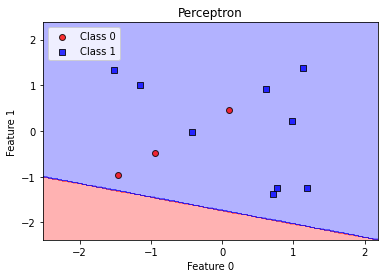

In [23]:
ppn = Perceptron(n_iter=15, eta=0.01, random_state=1)
ppn.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ppn)
plt.title('Perceptron')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper left')

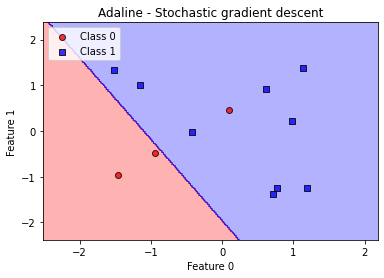

In [24]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper left')

Text(0, 0.5, 'Average loss')

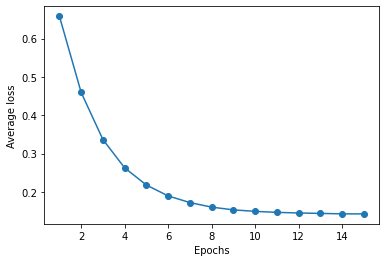

In [25]:
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')